In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl
import time

import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm


# Tarea 3: Encuentre la regresión

Ud recibe unos datos $x$ y $y$ cómo se muestran a continuación. Ud debe responder cuatro preguntas a partir de estos datos. Suponga que ud tiene un modelo tal que $y=f(x)$ más aún desconoce $f$.

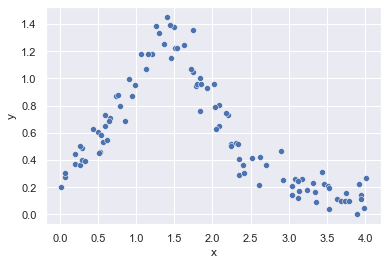

,x,y
0,0.065859,0.277413
1,0.020931,0.202239
2,0.070312,0.307369
3,0.206166,0.367530
4,0.286572,0.491144
...,...,...
95,3.922613,0.225565
96,3.898473,0.000000
97,3.952111,0.141005
98,3.939211,0.115500


In [2]:
df = pd.read_pickle('ex1.gz')
sns.scatterplot(x='x',y='y',data=df)
plt.show()
df


## (A) Pendiente e intercepto
Determine la pendiente de los datos en el intervalo $[0,1.5]$ y el valor del intercepto con el eje $y$. Es decir, $f(0)=?$. ¿Cuál es el valor de $r^2$?

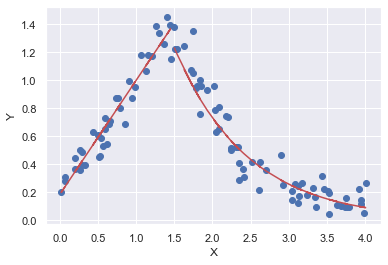

De 0 a 1.5, el valor de la pendiente es:  [0.81638696]
El valor del intercepto, es decir f(0) es:  [0.18270691]
El valor de r^2 es:  [0.93164163]


In [3]:
x = df["x"].to_numpy().reshape(-1,1)
y = df["y"].to_numpy().reshape(-1,1)


lx = []
ly = []
lx2 = []
ly2 = []
e_y = []
for i in range(len(x)):
    if x[i]<=1.5 :
        lx.append(x[i])
        ly.append(y[i])
    else:
        if y[i]!=0:
            lx2.append(x[i])
            ly2.append(y[i])
            e_y.append(np.log(y[i]))
        
        
x_a = np.array(lx).reshape(-1,1)
y_a = np.array(ly).reshape(-1,1)
x_b = np.array(lx2).reshape(-1,1)
y_b = np.array(ly2).reshape(-1,1)
f_x = np.array(e_y).reshape(-1,1)
        




P = np.array([np.ones([len(x_a), 1]) , x_a]).reshape(2,len(x_a)).T
coeffs = np.linalg.inv(P.T @ P) @ P.T @ y_a
b, m = coeffs
f_ajuste = b + m*x_a



P2 = np.array([np.ones([len(x_b), 1]) , x_b]).reshape(2,len(x_b)).T
coeffs2 = np.linalg.inv(P2.T @ P2) @ P2.T @ f_x
b2, m2 = coeffs2
f_ajuste_lineal2 = b2 + m2*x_b
f_ajuste2 = np.exp(b2 + m2*x_b)



plt.plot(x_a, y_a, 'bo')
plt.plot(x_a,f_ajuste,'r')
plt.plot(x_b, y_b, 'bo')
plt.plot(x_b,f_ajuste2,'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



div = len(x_a)
s_x = sum(x_a)
s_y = sum(y_a)
s_xy = sum(x_a*y_a)
s_xcu = sum(x_a*x_a)
s_ycu = sum(y_a*y_a)
prom_x = s_x/div
prom_y = s_y/div

sigma_x = np.sqrt((s_xcu/div) - prom_x*prom_x)
sigma_y = np.sqrt(s_ycu/div - prom_y*prom_y)

cov = (s_xy/div) - (prom_x*prom_y)
rr = (cov/(sigma_x*sigma_y))*(cov/(sigma_x*sigma_y))





print('De 0 a 1.5, el valor de la pendiente es: ', m)
print('El valor del intercepto, es decir f(0) es: ', b)
print('El valor de r^2 es: ', rr)




















## (B) Regresión polinomial
Suponga que quiere realizar la siguiente regresión polinomial,
$$y=\beta_1+\beta_2x+\beta_2x^2+\beta_2x^3+\beta_2x^4+\beta_2x^5.$$
Plantee la función de costo que le permita calcular los coeficientes y calcule $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. ¿Cuál es el $r^2$?

Calcule $f(0)$ y compare con los resultados anteriores




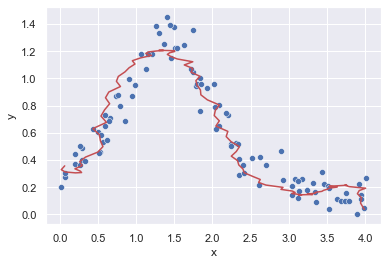

Beta_1:  -0.8426049057441299
Beta_2:  3.784788990975075
Beta_3:  -3.003387936799839
Beta_4:  0.8584448233185061
Beta_5:  -0.08305817014082385


Valor de costo:  0.012550626857929703
El valor de r^2 es:  0.9111078866334711 . El valor de r^2 es bastante cercano a 1, por lo que la función dada presenta un buen ajuste
Valor de F(0):  0.35735829271223607


In [4]:

x = df["x"]
y = df["y"]

x_a = np.array(lx)
y_a = np.array(ly)


lista = []
for i in range(len(x)):
    lista.append([1, x[i], x[i]*x[i], x[i]*x[i]*x[i], x[i]*x[i]*x[i]*x[i], x[i]*x[i]*x[i]*x[i]*x[i]])

    
Mbg = np.matrix(lista)
b = np.array([y]).reshape(-1,1)
Mb = np.matrix(b)


def L_cost(k ,Mbg ,Mb):
    
    m,n = Mbg.shape
    X = np.matrix(k).T
    DeltaB=(Mbg*X - Mb) 
    return (DeltaB.T*DeltaB)[0,0]/m 
 

ah1 = sp.optimize.minimize(fun=L_cost,x0=np.zeros(Mbg.shape[1]), args = (Mbg,Mb), tol=1e-10)
ah1['x']


cons =  np.linspace(0,4,100)

def Polinomio(a_5,a_4,a_3,a_2,a_1,a_0,var):
    return  a_0 +  a_1*var +a_2*var*var + a_3*var*var*var+ a_4*var*var*var*var + a_5*var*var*var*var*var 


f = Polinomio(ah1['x'][5],ah1['x'][4],ah1['x'][3],ah1['x'][2],ah1['x'][1],ah1['x'][0],cons)
rr = 1-np.sum((f - y)**2)/np.sum((y-y.mean())**2)


sns.scatterplot(x ='x', y ='y',data=df)
plt.plot(x,f,"-", color='r')
plt.show()

print('Beta_1: ',ah1['x'][1])
print('Beta_2: ',ah1['x'][2])
print('Beta_3: ',ah1['x'][3])
print('Beta_4: ',ah1['x'][4])
print('Beta_5: ',ah1['x'][5])

print()
print()
print('Valor de costo: ',L_cost(ah1['x'],Mbg,Mb))
print('El valor de r^2 es: ',rr, '. El valor de r^2 es bastante cercano a 1, por lo que la función dada presenta un buen ajuste') 
print('Valor de F(0): ',f[0])






## (C) Regresión polinomial exacta
Resulta, que cuando se quiere hacer alguna regresión polinomial esta se puede hacer de forma exacta. ¿Cómo? Suponga que ud va a considerar que su problema en lugar de tener $1$ variable ($x$) tiene $n+1$, siendo $n$ el orden del polinomio a ajustar. Es decir, sus nuevas variables van a ser $\{x_0,\,x_1,\,x_2,\,x_3,\dots,\,x_n\}$ definiendo $x_j=x^j$. Así pues, siguiendo el mismo procedimiento para la regresión lineal multidimensional que realizamos para el ejercicio de datos inmobiliarios, puede encontrar los valores de los coeficientes $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. Encuentre estos valores y compare con los resultados en la sección **(B)**.

Calcule $f(0)$ y compare con los resultados anteriores.

> Si ud se pregunta si esto es posible la respuesta es sí. Inclusive, esto se puede extender a cualquier a cualquier conjunto de funciones, tal que $x_j=f_j(x)$, que represente un conjunto "linealmente independiente" (¡Me estoy adelantando a *Fourier*!). Para quienes quieran explorar algunas curiosidades matemáticas, cuando $n+1$ es igual al número de puntos o valores de $x$ (y todos diferentes) la matriz es siempre invertible y resulta ser la inversa de una matriz de Vandermonde.

In [5]:
Y = df.loc[:, ['y']]

Y


,y
0,0.277413
1,0.202239
2,0.307369
3,0.367530
4,0.491144
...,...
95,0.225565
96,0.000000
97,0.141005
98,0.115500


In [6]:

y, type(y), Y, type(Y)

(0     0.277413
 1     0.202239
 2     0.307369
 3     0.367530
 4     0.491144
         ...   
 95    0.225565
 96    0.000000
 97    0.141005
 98    0.115500
 99    0.048689
 Name: y, Length: 100, dtype: float64,
 pandas.core.series.Series,
            y
 0   0.277413
 1   0.202239
 2   0.307369
 3   0.367530
 4   0.491144
 ..       ...
 95  0.225565
 96  0.000000
 97  0.141005
 98  0.115500
 99  0.048689
 
 [100 rows x 1 columns],
 pandas.core.frame.DataFrame)

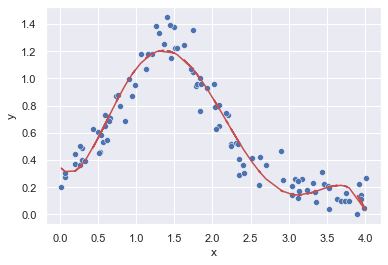

Beta_1:  -0.8358826852674255
Beta_2:  3.772764006713336
Beta_3:  -2.995260116916744
Beta_4:  0.8561470488708196
Beta_5:  -0.08282854280695916
F(0):  0.35644668496184834


In [7]:
x = df["x"]
y = df["y"]


arreglo_x = np.array(x).reshape(-1, 1)
arreglo_y = np.array(y).reshape(-1, 1)

P3 = np.array([np.ones([len(x), 1]), arreglo_x, arreglo_x**2, arreglo_x**3, arreglo_x**4, arreglo_x**5]).reshape(6, len(x)).T
coeffs = np.linalg.inv(P3.T @ P3) @ P3.T @ arreglo_y
a0, a1, a2, a3, a4, a5 = coeffs
f_ajuste3 = a0 + (a1*arreglo_x) + (a2*arreglo_x*arreglo_x) + (a3*arreglo_x*arreglo_x*arreglo_x) +  (a4*arreglo_x*arreglo_x*arreglo_x*arreglo_x) + (a5*arreglo_x*arreglo_x*arreglo_x*arreglo_x*arreglo_x)     


plt.figure()
sns.scatterplot(x='x',y='y',data = df)
plt.plot(arreglo_x, f_ajuste3, c ='r')
plt.ylabel('y')
plt.xlabel('x')
plt.show()


print('Beta_1: ',coeffs.tolist()[1][0])
print('Beta_2: ',coeffs.tolist()[2][0])
print('Beta_3: ',coeffs.tolist()[3][0])
print('Beta_4: ',coeffs.tolist()[4][0])
print('Beta_5: ',coeffs.tolist()[5][0])
print('F(0): ',coeffs.tolist()[0][0])

In [8]:
X = df.loc[:, ['x']].rename(columns={'x': 'x1'})
X.insert(0, 'x0', 1)
X['x2'] = X['x1']*X['x1']

X

,x0,x1,x2
0,1,0.065859,0.004337
1,1,0.020931,0.000438
2,1,0.070312,0.004944
3,1,0.206166,0.042504
4,1,0.286572,0.082123
...,...,...,...
95,1,3.922613,15.386893
96,1,3.898473,15.198094
97,1,3.952111,15.619183
98,1,3.939211,15.517382


In [9]:
x, type(x), X, type(X)

(0     0.065859
 1     0.020931
 2     0.070312
 3     0.206166
 4     0.286572
         ...   
 95    3.922613
 96    3.898473
 97    3.952111
 98    3.939211
 99    3.987120
 Name: x, Length: 100, dtype: float64,
 pandas.core.series.Series,
     x0        x1         x2
 0    1  0.065859   0.004337
 1    1  0.020931   0.000438
 2    1  0.070312   0.004944
 3    1  0.206166   0.042504
 4    1  0.286572   0.082123
 ..  ..       ...        ...
 95   1  3.922613  15.386893
 96   1  3.898473  15.198094
 97   1  3.952111  15.619183
 98   1  3.939211  15.517382
 99   1  3.987120  15.897126
 
 [100 rows x 3 columns],
 pandas.core.frame.DataFrame)

## (D) Regresión a un modelo teórico

Suponga que su modelo teórico es el siguiente:
$$y=\frac{a}{\left[(x-b)^2+c\right]^\gamma}.$$
Halle $a$, $b$, $c$ y $\gamma$.

Calcule $f(0)$ y compare con los resultados anteriores

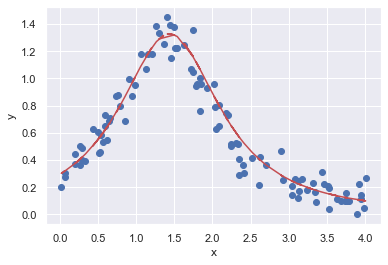

a:  0.9485669093266498
b:  1.4390923532091426
c:  0.7418543862022944
gama:  1.1293627526591605
Finalmente, F(0) es:  0.294998696221309 , con buena aproximacion a los valores anteriormente reportados


In [10]:
x = df["x"]
y = df["y"]


lx = []
ly = []
for i in range(len(x)):
    if x[i]<=1.5 :
        lx.append(x[i])
        ly.append(y[i])
        
        
x_a = np.array(lx)
y_a = np.array(ly)

def f(vec,x_a): 
    return (vec[0])/((x_a-vec[1])**2 + vec[2])**vec[3]

def L_ajuste(vec,x_a,y_a): 
    deltaY=f(vec,x_a) - y_a
    return np.dot(deltaY,deltaY)/len(y_a)


res2 = sp.optimize.minimize(fun=L_ajuste, x0=np.array([0,1,0,0]), args = (x_a,y_a), method='L-BFGS-B', tol=1e-8)
b = f(res2.x,0)


plt.figure()
plt.scatter(x,y, label = "Datos")
plt.plot(x,f(res2.x,x), c = 'r', label = "Ajuste")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


print('a: ',res2["x"][0])
print('b: ', res2["x"][1])
print('c: ',res2["x"][2])
print('gama: ',res2["x"][3])

print('Finalmente, F(0) es: ',b, ', con buena aproximacion a los valores anteriormente reportados')






# Tarea 4

Con base a los métodos vistos en clase resuelva las siguientes dos preguntas

## (A) Integrales

* $\int_{0}^{1}x^{-1/2}\,\text{d}x$
* $\int_{0}^{\infty}e^{-x}\ln{x}\,\text{d}x$
* $\int_{0}^{\infty}\frac{\sin{x}}{x}\,\text{d}x$

In [11]:
#Cuadraturas gaussianas



#(1) Vandermonde Matrix

x_ini = 1/2
x_fin = 1
x_fin_2 = 10
nodos = 11

X = np.linspace(x_ini,x_fin, nodos)
X2 = np.linspace(x_ini,x_fin_2, nodos)


V = np.matrix([X**i for i in range(len(X))]  )
V_inv = np.linalg.inv(V)



V2 = np.matrix([X2**i for i in range(len(X2))]  )
V2_inv = np.linalg.inv(V2)




I = np.matrix([ (   ( x_fin**(n+1) - x_ini**(n+1) ) /(n+1)   ) for n in range(len(X)) ]).T
I2 = np.matrix([ (   ( x_fin_2**(n+1) - x_ini**(n+1) ) /(n+1)   ) for n in range(len(X2)) ]).T


def f(x):
    return x**(-1/2)

def g(x):
    return np.exp(-x)*np.log(x)

def h(x):
    return np.sin(x)/x


vec_f = np.matrix([ f(X[i]) for i in range(len(X))]  ).T
vec_g = np.matrix([ g(X2[i]) for i in range(len(X2))]  ).T
vec_h = np.matrix([ h(X2[i]) for i in range(len(X2))]  ).T




#print(X)
#print(V)
#print(V_inv)
#print(I)
#print(vec_f)
#print(vec_g)
#print(vec_h)

#print(vec_f.shape)
#print(vec_g.shape)
#print(vec_h.shape)


print("El calculo de la primera integral es: ", (vec_f.T*V_inv*I)[0,0])
print("El calculo de la segunda integral es: ", (vec_g.T*V2_inv*I)[0,0])
print("El calculo de la tercera integral es: ", (vec_h.T*V_inv*I)[0,0])









El calculo de la primera integral es:  0.5857855909801515
El calculo de la segunda integral es:  -0.08835991357603967
El calculo de la tercera integral es:  0.061327572679147124


In [3]:
#Simpson

inicio = time.time()

x_f_ini = 0.000001
x_f_fin = 1
x_ini =0.000001
x_fin =100
nodos=1000001


def f(x):
    return x**(-1/2)

def g(x):
    return np.exp(-x)*np.log(x)

def h(x):
    return np.sin(x)/x


def simpson_integrate(desde, hasta, nodos, f):
    x, delta_x = np.linspace( desde, hasta, num=nodos-1 , retstep=True  )
    return (delta_x/3)*(   f(x[0]) + 2*np.sum(f(x[2:len(x)-1:2])) + 4*np.sum(f(x[1::2])) + f(x[-1]) )



    
integral_f = simpson_integrate(x_f_ini, x_f_fin, nodos, f)    
integral_g = simpson_integrate(x_ini, x_fin, nodos, g)
integral_h = simpson_integrate(x_ini, x_fin, nodos, h)



print(f"El calculo de la primera integral es {integral_f}")
print(f"El calculo de la segunda integral es {integral_g}")
print(f"El calculo de la tercera integral es {integral_h}")

time.sleep(0)



fin = time.time()

print("Tiempo de ejecución: ",fin-inicio, "s")





El calculo de la primera integral es 1.9980056792766332
El calculo de la segunda integral es -0.5772747948147595
El calculo de la tercera integral es 1.5622239605373698
Tiempo de ejecución:  0.09174180030822754 s


In [13]:
#Trapecio

inicio = time.time()


n=100
x_f = np.linspace(0.000001,1,1000001) #se necesita esta precision de division en intervalos para obtener coincidenciaen los primeros 
x = np.linspace(0.000001,n,1000001)


def f(x):
    return x**(-1/2)

def g(x):
    return np.exp(-x)*np.log(x)

def h(x):
    return np.sin(x)/x

def integrate(x,f):
    calculo=0
    for i in range(len(x)-1):
        calculo = calculo + (f(x[i+1])+(f(x[i])))*abs(x[i+1]-x[i])/2
    return(calculo)

    
integral_f = integrate(x_f,f)    
integral_g = integrate(x,g)
integral_h = integrate(x,h)



print(f"El calculo de la primera integral es {integral_f}")
print(f"El calculo de la segunda integral es {integral_g}")
print(f"El calculo de la tercera integral es {integral_h}")


#Demora aprox. 13 segundos en arrojar el resultado RAM 16 GB


time.sleep(0)



fin = time.time()

print("Tiempo de ejecución: ",fin-inicio, "s")




El calculo de la primera integral es 1.9980396454151288
El calculo de la segunda integral es -0.5773442593303427
El calculo de la tercera integral es 1.5622244668962069
Tiempo de ejecución:  13.009706974029541 s


## (B) Fourier

Calcule la transformada rápida de Fourier para la función de la **Tarea 3 (D)** en el intervalo $[0,4]$ ($k$ máximo $2\pi n/L$ para $n=25$). Ajuste la transformada de Fourier para los datos de la **Tarea 3** usando el método de regresión exacto de la **Tarea 3 (C)** y compare con el anterior resultado. Para ambos ejercicios haga una interpolación y grafique para comparar.

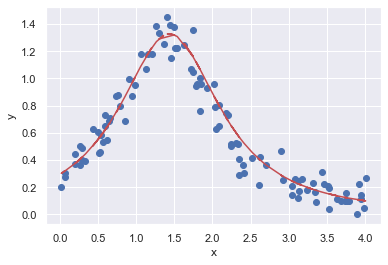

'\nprint(\'a: \',res2["x"][0])\nprint(\'b: \', res2["x"][1])\nprint(\'c: \',res2["x"][2])\nprint(\'gama: \',res2["x"][3])\n\nprint(\'Finalmente, F(0) es: \',b, \', con buena aproximacion a los valores anteriormente reportados\')\n\n'

In [14]:

x = df["x"]
y = df["y"]


lx = []
ly = []
for i in range(len(x)):
    if x[i]<=1.5 :
        lx.append(x[i])
        ly.append(y[i])
        
        
x_a = np.array(lx)
y_a = np.array(ly)

def f(vec,x_a): 
    return (vec[0])/((x_a-vec[1])**2 + vec[2])**vec[3]

def L_ajuste(vec,x_a,y_a): 
    deltaY=f(vec,x_a) - y_a
    return np.dot(deltaY,deltaY)/len(y_a)


res2 = sp.optimize.minimize(fun=L_ajuste, x0=np.array([0,1,0,0]), args = (x_a,y_a), method='L-BFGS-B', tol=1e-8)
b = f(res2.x,0)


plt.figure()
plt.scatter(x,y, label = "Datos")
plt.plot(x,f(res2.x,x), c = 'r', label = "Ajuste")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

"""
print('a: ',res2["x"][0])
print('b: ', res2["x"][1])
print('c: ',res2["x"][2])
print('gama: ',res2["x"][3])

print('Finalmente, F(0) es: ',b, ', con buena aproximacion a los valores anteriormente reportados')

"""






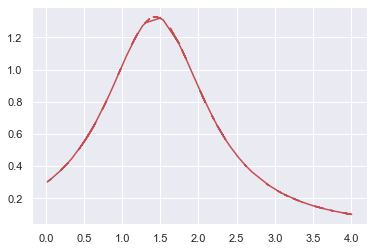

In [15]:
plt.plot(x,f(res2.x,x), c = 'r', label = "Ajuste")
x = x_a 
y = f(res2.x,x)


In [16]:
# 1ro, hallar coeficientes a_j, b_j


Nf = 25

def a_j(j):
    global x, y
    #debe integrar la función de 0 a 4
    k_j = 2*np.pi*j/4
    new_y = y*np.cos(k_j*x)
   
    return sp.integrate.simpson(new_y, x)

def b_j(j):
    global x, y
    #debe integrar la función de 0 a 4
    k_j = 2*np.pi*j/4
    new_y = y*np.sin(k_j*x)
    return sp.integrate.simpson(new_y, x)
    
    

    
A_j = np. array([a_j(j) for j in range(Nf)])
B_j = np. array([b_j(j) for j in range(Nf)])







In [17]:
print(A_j)
print()
print(B_j)

[ 1.12271993  0.09055661 -0.54156923  0.16987651  0.03040855 -0.18666674
  0.10906827 -0.05535532 -0.06469796  0.07045033 -0.12074357 -0.03242398
  0.06094871 -0.05507659  0.06575006  0.08933063 -0.0248382  -0.02626271
 -0.03952117  0.02046983 -0.05281754 -0.17375368  0.07904749  0.12834424
 -0.04505808]

[ 0.          0.94052492  0.0153534  -0.19920088  0.26636325 -0.04459506
 -0.03541277  0.13238869 -0.0721588   0.05025412  0.06449748 -0.11403931
  0.01766879 -0.00695634 -0.07597523  0.07690022  0.07675283  0.03695708
  0.0133034   0.01074276  0.10953406 -0.06706653 -0.17461797  0.08136979
  0.03024549]


In [18]:
#Trnasformada de Fourier


x_tilde = np.linspace(0, 4, 10000) 
k_j = np. array([2*np.pi*j/4 for j in range(Nf)])
y_tilde = np.sum([  (A_j[j]*np.cos(k_j[j]*x_tilde)  +  B_j[j]*np.sin(k_j[j]*x_tilde)) for j in range(Nf)  ], axis=0)





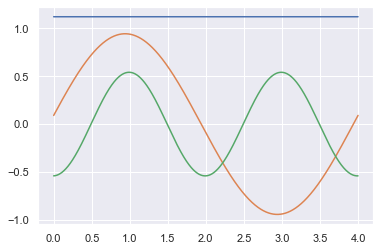

In [19]:



plt.plot(x_tilde, (A_j[0]*np.cos(k_j[0]*x_tilde)  +  B_j[0]*np.sin(k_j[0]*x_tilde))  )
plt.plot(x_tilde, (A_j[1]*np.cos(k_j[1]*x_tilde)  +  B_j[1]*np.sin(k_j[1]*x_tilde))  )
plt.plot(x_tilde, (A_j[2]*np.cos(k_j[2]*x_tilde)  +  B_j[2]*np.sin(k_j[2]*x_tilde))  )


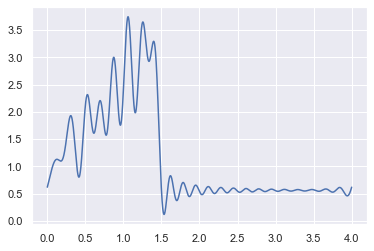

In [24]:
# Gráfica de la Transformada rápida (discreta) de fourier de 0 a 4

plt.plot(x_tilde, y_tilde)

<ipython-input-38-e02a1733a4e9>:17: RuntimeWarning: invalid value encountered in power
  return (vec[0])/((x_a-vec[1])**2 + vec[2])**vec[3]
<ipython-input-38-e02a1733a4e9>:17: RuntimeWarning: divide by zero encountered in true_divide
  return (vec[0])/((x_a-vec[1])**2 + vec[2])**vec[3]
<ipython-input-38-e02a1733a4e9>:17: RuntimeWarning: overflow encountered in true_divide
  return (vec[0])/((x_a-vec[1])**2 + vec[2])**vec[3]
<ipython-input-38-e02a1733a4e9>:17: RuntimeWarning: overflow encountered in power
  return (vec[0])/((x_a-vec[1])**2 + vec[2])**vec[3]
<ipython-input-38-e02a1733a4e9>:17: RuntimeWarning: overflow encountered in double_scalars
  return (vec[0])/((x_a-vec[1])**2 + vec[2])**vec[3]


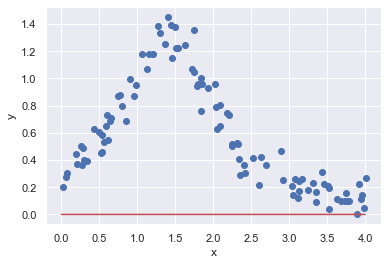

a:  -1685169385.3931668
b:  91.19770176673765
c:  -3678.882969463527
gama:  814569700.7809094
Finalmente, F(0) es:  -0.0 , sin aproximación a los datos anteriores


In [38]:


x = df["x"]
y = df["y"]


lx = []
ly = []
for i in range(len(x)):
    if x[i]<=1.5 :
        lx.append(x[i])
        ly.append(y[i])
        
        
x_a = np.array(lx)
y_a = np.array(ly)

def f(vec,x_a): 
    return (vec[0])/((x_a-vec[1])**2 + vec[2])**vec[3]

def L_ajuste(vec,x_a,y_a): 
    deltaY=f(vec,x_a) - y_a
    return np.dot(deltaY,deltaY)/len(y_a)


res4 = sp.optimize.minimize(fun=L_ajuste, x0=np.array([0,1,0,0]), args = (x_tilde,y_tilde), method='L-BFGS-B', tol=1e-8)
b = f(res4.x,0)


plt.figure()
plt.scatter(x,y, label = "Datos")
plt.plot(x_tilde,f(res4.x,x_tilde), c = 'r', label = "Ajuste")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


print('a: ',res4["x"][0])
print('b: ', res4["x"][1])
print('c: ',res4["x"][2])
print('gama: ',res4["x"][3])

print('Finalmente, F(0) es: ',b, ', sin aproximación a los datos anteriores')




# la grafica ajustada no me da (me da absurdamente una linea constante)






















